# Predicting Schizophrenia by FNC and SBM features

In [1]:
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)


In [2]:
train_df_1 = pd.read_csv('train_FNC.csv')
train_df_2 = pd.read_csv('train_labels.csv')
train_df_3 = pd.read_csv('train_SBM.csv')

test_df_1 = pd.read_csv('test_FNC.csv')
test_df_2 = pd.read_csv('test_SBM.csv')

In [3]:
def exploratory_DA(df):
    print(df.head())
    print(df.isna().any())
    print(' *****-----*****-----***** ')
    print(df.info())
    print(' *****-----*****-----***** ')
    print('')
    print(df.shape)

In [4]:
exploratory_DA(train_df_1)
exploratory_DA(train_df_2)
exploratory_DA(train_df_3)

       Id     FNC1      FNC2     FNC3     FNC4     FNC5      FNC6      FNC7  \
0  120873  0.34312  0.045761 -0.13112  0.15034  0.18082  0.289160  0.069545   
1  135376  0.28790  0.102570 -0.32343 -0.22776  0.12328  0.367020 -0.084040   
2  139149  0.24585  0.216620 -0.12468 -0.35380  0.16150 -0.002032 -0.133020   
3  146791  0.42090  0.331380  0.24453  0.17167  0.59223  0.431050  0.280290   
4  153870 -0.14621 -0.468630 -0.52880 -0.50381 -0.51052 -0.029113 -0.015192   

       FNC8      FNC9     FNC10     FNC11     FNC12     FNC13     FNC14  \
0 -0.052489  0.124000  0.477620  0.165250  0.152740  0.270490 -0.023773   
1  0.038793 -0.006287  0.101690 -0.376340  0.142640 -0.088119 -0.056629   
2 -0.035222  0.259040 -0.045302 -0.027871  0.424240 -0.361020 -0.256640   
3  0.289620  0.356800  0.286340  0.048550 -0.080789 -0.060777  0.260040   
4  0.360170  0.005944  0.024801 -0.031034  0.559150  0.048705  0.156080   

      FNC15    FNC16    FNC17     FNC18     FNC19     FNC20    FNC21  \
0 

In [5]:
exploratory_DA(test_df_1)
exploratory_DA(test_df_2)

       Id      FNC1      FNC2      FNC3      FNC4      FNC5      FNC6  \
0  100004  0.476127  0.064466  0.053238 -0.608133  0.073988 -0.637038   
1  100015  0.013833  0.267183  0.232178 -0.167151 -0.261327  0.191869   
2  100026 -0.435452  0.046780  0.243742  0.397030 -0.147821  0.173620   
3  100030 -0.204510 -0.036735 -0.760705 -0.740495  0.064668  0.349926   
4  100047  0.599435 -0.166441  0.122431  0.011539  0.346906 -0.017430   

       FNC7      FNC8      FNC9     FNC10     FNC11     FNC12     FNC13  \
0  0.113556 -0.192434 -0.004025 -0.060474 -0.256244 -0.239706  0.113166   
1  0.406493  0.088761  0.177048  0.036718 -0.656346  0.415506 -0.054457   
2 -0.461963 -0.610736  0.419753  0.400985 -0.220077  0.287517  0.002372   
3 -0.273826 -0.174384 -0.120248  0.175618 -0.122505  0.379375  0.040945   
4 -0.274734  0.211510  0.151012 -0.033434 -0.286008 -0.024012 -0.245284   

      FNC14     FNC15     FNC16     FNC17     FNC18     FNC19     FNC20  \
0 -0.136103 -0.322507  0.299439  0.

In [6]:
train_df_1 = pd.merge(train_df_1, train_df_2, on='Id', how='left')

In [7]:
#train_df_1['Class'] = train_df_2[['Class']]

In [8]:
train_df_1.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,FNC41,FNC42,FNC43,FNC44,FNC45,FNC46,FNC47,FNC48,FNC49,FNC50,FNC51,FNC52,FNC53,FNC54,FNC55,FNC56,FNC57,FNC58,FNC59,FNC60,FNC61,FNC62,FNC63,FNC64,FNC65,FNC66,FNC67,FNC68,FNC69,FNC70,FNC71,FNC72,FNC73,FNC74,FNC75,FNC76,FNC77,FNC78,FNC79,FNC80,FNC81,FNC82,FNC83,FNC84,FNC85,FNC86,FNC87,FNC88,FNC89,FNC90,FNC91,FNC92,FNC93,FNC94,FNC95,FNC96,FNC97,FNC98,FNC99,FNC100,FNC101,FNC102,FNC103,FNC104,FNC105,FNC106,FNC107,FNC108,FNC109,FNC110,FNC111,FNC112,FNC113,FNC114,FNC115,FNC116,FNC117,FNC118,FNC119,FNC120,FNC121,FNC122,FNC123,FNC124,FNC125,FNC126,FNC127,FNC128,FNC129,FNC130,FNC131,FNC132,FNC133,FNC134,FNC135,FNC136,FNC137,FNC138,FNC139,FNC140,FNC141,FNC142,FNC143,FNC144,FNC145,FNC146,FNC147,FNC148,FNC149,FNC150,FNC151,FNC152,FNC153,FNC154,FNC155,FNC156,FNC157,FNC158,FNC159,FNC160,FNC161,FNC162,FNC163,FNC164,FNC165,FNC166,FNC167,FNC168,FNC169,FNC170,FNC171,FNC172,FNC173,FNC174,FNC175,FNC176,FNC177,FNC178,FNC179,FNC180,FNC181,FNC182,FNC183,FNC184,FNC185,FNC186,FNC187,FNC188,FNC189,FNC190,FNC191,FNC192,FNC193,FNC194,FNC195,FNC196,FNC197,FNC198,FNC199,FNC200,FNC201,FNC202,FNC203,FNC204,FNC205,FNC206,FNC207,FNC208,FNC209,FNC210,FNC211,FNC212,FNC213,FNC214,FNC215,FNC216,FNC217,FNC218,FNC219,FNC220,FNC221,FNC222,FNC223,FNC224,FNC225,FNC226,FNC227,FNC228,FNC229,FNC230,FNC231,FNC232,FNC233,FNC234,FNC235,FNC236,FNC237,FNC238,FNC239,FNC240,FNC241,FNC242,FNC243,FNC244,FNC245,FNC246,FNC247,FNC248,FNC249,FNC250,FNC251,FNC252,FNC253,FNC254,FNC255,FNC256,FNC257,FNC258,FNC259,FNC260,FNC261,FNC262,FNC263,FNC264,FNC265,FNC266,FNC267,FNC268,FNC269,FNC270,FNC271,FNC272,FNC273,FNC274,FNC275,FNC276,FNC277,FNC278,FNC279,FNC280,FNC281,FNC282,FNC283,FNC284,FNC285,FNC286,FNC287,FNC288,FNC289,FNC290,FNC291,FNC292,FNC293,FNC294,FNC295,FNC296,FNC297,FNC298,FNC299,FNC300,FNC301,FNC302,FNC303,FNC304,FNC305,FNC306,FNC307,FNC308,FNC309,FNC310,FNC311,FNC312,FNC313,FNC314,FNC315,FNC316,FNC317,FNC318,FNC319,FNC320,FNC321,FNC322,FNC323,FNC324,FNC325,FNC326,FNC327,FNC328,FNC329,FNC330,FNC331,FNC332,FNC333,FNC334,FNC335,FNC336,FNC337,FNC338,FNC339,FNC340,FNC341,FNC342,FNC343,FNC344,FNC345,FNC346,FNC347,FNC348,FNC349,FNC350,FNC351,FNC352,FNC353,FNC354,FNC355,FNC356,FNC357,FNC358,FNC359,FNC360,FNC361,FNC362,FNC363,FNC364,FNC365,FNC366,FNC367,FNC368,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,Class
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,0.165250,0.152740,0.270490,-0.023773,0.057374,-0.13873,0.24606,-0.036653,0.055729,0.195540,0.11568,0.353010,0.33846,0.22753,-0.065594,0.086119,-0.116460,0.41478,-0.35864,0.036615,0.35761,0.57461,0.21516,-0.156410,0.069346,0.39911,-0.086613,0.054857,0.192330,-0.365520,-0.27341,-0.275500,-0.035595,-0.492590,-0.183540,-0.19786,-0.236500,0.22927,0.15965,0.35314,-0.13773,-0.040416,-0.283880,-0.22868,-0.032258,-0.23445,0.42534,0.020722,-0.068762,-0.21617,-0.10530,0.16399,-0.21897,0.076665,-0.40016,-0.309500,-0.198070,-0.379060,-0.440270,-0.383150,-0.509460,-0.40251,0.101500,-0.027104,0.21604,0.13931,-0.118150,-0.43355,0.46781,-0.010129,-0.16441,-0.015152,0.280880,0.187800,-0.24448,0.20537,-0.059828,-0.028747,0.42068,0.08109,0.030801,0.061283,0.322770,0.202950,0.045847,0.48698,-0.19909,0.208740,-0.20510,0.11512,0.26102,0.45505,0.12256,0.24531,0.36257,0.22290,0.12385,-0.029744,0.26057,0.366700,0.19348,0.09547,-0.36363,-0.176480,-0.051969,0.092655,0.23697,0.162980,0.23635,0.38064,0.34044,0.45080,0.29646,0.60907,0.46076,0.064533,0.217620,-0.075781,0.086935,0.190820,-0.33789,0.22076,-0.162430,-0.080787,-0.214670,-0.29541,0.334930,-0.070368,0.233690,0.413170,0.29707,0.130850,0.094048,0.404530,-0.13770,0.27090,0.202730,0.366490,-0.033444,-0.016890,0.244160,-0.062924,0.317250,0.601670,-0.424280,-0.486960,-0.458760,-0.241750,-0.475170,-0.31007,-0.1

In [9]:
df = pd.merge(train_df_1, train_df_3, on='Id', how='left')

In [10]:
test_df_1.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,FNC41,FNC42,FNC43,FNC44,FNC45,FNC46,FNC47,FNC48,FNC49,FNC50,FNC51,FNC52,FNC53,FNC54,FNC55,FNC56,FNC57,FNC58,FNC59,FNC60,FNC61,FNC62,FNC63,FNC64,FNC65,FNC66,FNC67,FNC68,FNC69,FNC70,FNC71,FNC72,FNC73,FNC74,FNC75,FNC76,FNC77,FNC78,FNC79,FNC80,FNC81,FNC82,FNC83,FNC84,FNC85,FNC86,FNC87,FNC88,FNC89,FNC90,FNC91,FNC92,FNC93,FNC94,FNC95,FNC96,FNC97,FNC98,FNC99,FNC100,FNC101,FNC102,FNC103,FNC104,FNC105,FNC106,FNC107,FNC108,FNC109,FNC110,FNC111,FNC112,FNC113,FNC114,FNC115,FNC116,FNC117,FNC118,FNC119,FNC120,FNC121,FNC122,FNC123,FNC124,FNC125,FNC126,FNC127,FNC128,FNC129,FNC130,FNC131,FNC132,FNC133,FNC134,FNC135,FNC136,FNC137,FNC138,FNC139,FNC140,FNC141,FNC142,FNC143,FNC144,FNC145,FNC146,FNC147,FNC148,FNC149,FNC150,FNC151,FNC152,FNC153,FNC154,FNC155,FNC156,FNC157,FNC158,FNC159,FNC160,FNC161,FNC162,FNC163,FNC164,FNC165,FNC166,FNC167,FNC168,FNC169,FNC170,FNC171,FNC172,FNC173,FNC174,FNC175,FNC176,FNC177,FNC178,FNC179,FNC180,FNC181,FNC182,FNC183,FNC184,FNC185,FNC186,FNC187,FNC188,FNC189,FNC190,FNC191,FNC192,FNC193,FNC194,FNC195,FNC196,FNC197,FNC198,FNC199,FNC200,FNC201,FNC202,FNC203,FNC204,FNC205,FNC206,FNC207,FNC208,FNC209,FNC210,FNC211,FNC212,FNC213,FNC214,FNC215,FNC216,FNC217,FNC218,FNC219,FNC220,FNC221,FNC222,FNC223,FNC224,FNC225,FNC226,FNC227,FNC228,FNC229,FNC230,FNC231,FNC232,FNC233,FNC234,FNC235,FNC236,FNC237,FNC238,FNC239,FNC240,FNC241,FNC242,FNC243,FNC244,FNC245,FNC246,FNC247,FNC248,FNC249,FNC250,FNC251,FNC252,FNC253,FNC254,FNC255,FNC256,FNC257,FNC258,FNC259,FNC260,FNC261,FNC262,FNC263,FNC264,FNC265,FNC266,FNC267,FNC268,FNC269,FNC270,FNC271,FNC272,FNC273,FNC274,FNC275,FNC276,FNC277,FNC278,FNC279,FNC280,FNC281,FNC282,FNC283,FNC284,FNC285,FNC286,FNC287,FNC288,FNC289,FNC290,FNC291,FNC292,FNC293,FNC294,FNC295,FNC296,FNC297,FNC298,FNC299,FNC300,FNC301,FNC302,FNC303,FNC304,FNC305,FNC306,FNC307,FNC308,FNC309,FNC310,FNC311,FNC312,FNC313,FNC314,FNC315,FNC316,FNC317,FNC318,FNC319,FNC320,FNC321,FNC322,FNC323,FNC324,FNC325,FNC326,FNC327,FNC328,FNC329,FNC330,FNC331,FNC332,FNC333,FNC334,FNC335,FNC336,FNC337,FNC338,FNC339,FNC340,FNC341,FNC342,FNC343,FNC344,FNC345,FNC346,FNC347,FNC348,FNC349,FNC350,FNC351,FNC352,FNC353,FNC354,FNC355,FNC356,FNC357,FNC358,FNC359,FNC360,FNC361,FNC362,FNC363,FNC364,FNC365,FNC366,FNC367,FNC368,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,100004,0.476127,0.064466,0.053238,-0.608133,0.073988,-0.637038,0.113556,-0.192434,-0.004025,-0.060474,-0.256244,-0.239706,0.113166,-0.136103,-0.322507,0.299439,0.492948,0.233049,-0.312542,0.210541,-0.521582,0.323302,-0.161545,-0.122164,0.369105,0.640831,0.041661,0.196605,0.128142,0.304551,0.352879,0.416197,0.678723,0.277782,0.676364,-0.133499,0.102174,0.022148,0.136891,0.317406,0.464976,0.236121,-0.047108,0.205606,0.089988,-0.147220,0.488782,0.525100,0.618244,0.466729,0.118278,-0.354072,-0.183048,0.329956,0.589278,0.315583,0.295297,-0.600809,0.494652,0.160959,0.255609,-0.193390,-0.083103,0.202220,0.008339,0.381315,-0.366100,-0.039644,-0.486427,-0.006679,-0.495181,0.029642,-0.322448,0.785503,-0.492282,-0.406060,-0.318969,-0.397973,0.974066,0.287127,0.600215,0.774304,0.452479,0.184930,0.539818,0.437920,0.218293,0.308936,0.248976,-0.348114,-0.693480,-0.031707,0.057468,0.627384,-0.404116,0.021114,0.556828,0.499161,-0.618792,0.008733,0.477857,0.308268,0.240793,0.619218,0.698578,-0.027515,0.299079,-0.336364,0.428774,-0.619629,-0.129717,0.417993,-0.261193,0.485990,0.117933,-0.150409,0.139850,0.082803,0.466706,0.586503,0.390515,-0.269445,-0.697040,0.206192,0.621140,0.158508,0.515545,-0.257235,-0.013673,0.354709,0.245718,0.525980,0.085516,0.144865,-0.119287,-0.054111,0.262101,0.001703,-0.047827,0.200697,0.523638,0.403376,0.685739,0.602611,-0.242616,0.379205,0.346103,0.012405,0.660300,0.500315,-0.000537,-0.052383,-0.263314,0.613104,0.335751,0

In [11]:
test_df = pd.merge(test_df_1, test_df_2, on='Id', how='left')

In [12]:
df.describe()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,FNC41,FNC42,FNC43,FNC44,FNC45,FNC46,FNC47,FNC48,FNC49,FNC50,FNC51,FNC52,FNC53,FNC54,FNC55,FNC56,FNC57,FNC58,FNC59,FNC60,FNC61,FNC62,FNC63,FNC64,FNC65,FNC66,FNC67,FNC68,FNC69,FNC70,FNC71,FNC72,FNC73,FNC74,FNC75,FNC76,FNC77,FNC78,FNC79,FNC80,FNC81,FNC82,FNC83,FNC84,FNC85,FNC86,FNC87,FNC88,FNC89,FNC90,FNC91,FNC92,FNC93,FNC94,FNC95,FNC96,FNC97,FNC98,FNC99,FNC100,FNC101,FNC102,FNC103,FNC104,FNC105,FNC106,FNC107,FNC108,FNC109,FNC110,FNC111,FNC112,FNC113,FNC114,FNC115,FNC116,FNC117,FNC118,FNC119,FNC120,FNC121,FNC122,FNC123,FNC124,FNC125,FNC126,FNC127,FNC128,FNC129,FNC130,FNC131,FNC132,FNC133,FNC134,FNC135,FNC136,FNC137,FNC138,FNC139,FNC140,FNC141,FNC142,FNC143,FNC144,FNC145,FNC146,FNC147,FNC148,FNC149,FNC150,FNC151,FNC152,FNC153,FNC154,FNC155,FNC156,FNC157,FNC158,FNC159,FNC160,FNC161,FNC162,FNC163,FNC164,FNC165,FNC166,FNC167,FNC168,FNC169,FNC170,FNC171,FNC172,FNC173,FNC174,FNC175,FNC176,FNC177,FNC178,FNC179,FNC180,FNC181,FNC182,FNC183,FNC184,FNC185,FNC186,FNC187,FNC188,FNC189,FNC190,FNC191,FNC192,FNC193,FNC194,FNC195,FNC196,FNC197,FNC198,FNC199,FNC200,FNC201,FNC202,FNC203,FNC204,FNC205,FNC206,FNC207,FNC208,FNC209,FNC210,FNC211,FNC212,FNC213,FNC214,FNC215,FNC216,FNC217,FNC218,FNC219,FNC220,FNC221,FNC222,FNC223,FNC224,FNC225,FNC226,FNC227,FNC228,FNC229,FNC230,FNC231,FNC232,FNC233,FNC234,FNC235,FNC236,FNC237,FNC238,FNC239,FNC240,FNC241,FNC242,FNC243,FNC244,FNC245,FNC246,FNC247,FNC248,FNC249,FNC250,FNC251,FNC252,FNC253,FNC254,FNC255,FNC256,FNC257,FNC258,FNC259,FNC260,FNC261,FNC262,FNC263,FNC264,FNC265,FNC266,FNC267,FNC268,FNC269,FNC270,FNC271,FNC272,FNC273,FNC274,FNC275,FNC276,FNC277,FNC278,FNC279,FNC280,FNC281,FNC282,FNC283,FNC284,FNC285,FNC286,FNC287,FNC288,FNC289,FNC290,FNC291,FNC292,FNC293,FNC294,FNC295,FNC296,FNC297,FNC298,FNC299,FNC300,FNC301,FNC302,FNC303,FNC304,FNC305,FNC306,FNC307,FNC308,FNC309,FNC310,FNC311,FNC312,FNC313,FNC314,FNC315,FNC316,FNC317,FNC318,FNC319,FNC320,FNC321,FNC322,FNC323,FNC324,FNC325,FNC326,FNC327,FNC328,FNC329,FNC330,FNC331,FNC332,FNC333,FNC334,FNC335,FNC336,FNC337,FNC338,FNC339,FNC340,FNC341,FNC342,FNC343,FNC344,FNC345,FNC346,FNC347,FNC348,FNC349,FNC350,FNC351,FNC352,FNC353,FNC354,FNC355,FNC356,FNC357,FNC358,FNC359,FNC360,FNC361,FNC362,FNC363,FNC364,FNC365,FNC366,FNC367,FNC368,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,Class,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0

In [13]:
df.shape

(86, 412)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Columns: 412 entries, Id to SBM_map75
dtypes: float64(410), int64(2)
memory usage: 276.9 KB


In [15]:
abs(df.corr(numeric_only=True)['Class'].sort_values(ascending=False))

Class        1.000000
SBM_map67    0.427943
FNC78        0.320888
FNC353       0.289272
SBM_map17    0.273194
FNC293       0.272936
FNC337       0.257596
SBM_map52    0.251211
FNC200       0.247430
SBM_map64    0.240801
FNC279       0.239789
SBM_map3     0.227647
FNC102       0.213971
FNC13        0.213892
FNC278       0.207181
FNC75        0.205150
FNC190       0.204869
SBM_map22    0.195867
FNC265       0.189070
FNC291       0.185967
SBM_map8     0.177372
FNC20        0.171397
FNC213       0.170115
SBM_map13    0.168974
FNC4         0.165281
SBM_map73    0.151770
FNC256       0.151240
SBM_map26    0.149662
FNC22        0.146647
FNC179       0.144859
FNC233       0.144460
SBM_map43    0.142075
FNC263       0.140342
FNC334       0.139754
FNC339       0.138478
FNC164       0.135667
FNC49        0.132974
FNC167       0.132303
FNC342       0.131546
FNC371       0.128407
FNC329       0.125549
SBM_map1     0.125244
SBM_map4     0.124677
SBM_map45    0.120896
SBM_map6     0.118789
FNC198    

## I needed a filtering process since the number of dimensions is pretty high

In [16]:
correlation = abs(df.corr(numeric_only=True)['Class'].sort_values(ascending=False))

high_correlation_features = correlation[correlation > 0.20] #creates a pandas series

high_correlation_columns = high_correlation_features.index.tolist()

In [17]:
cols_to_visualize = high_correlation_columns[1:]

In [18]:
df_outlier_detection = df[cols_to_visualize]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

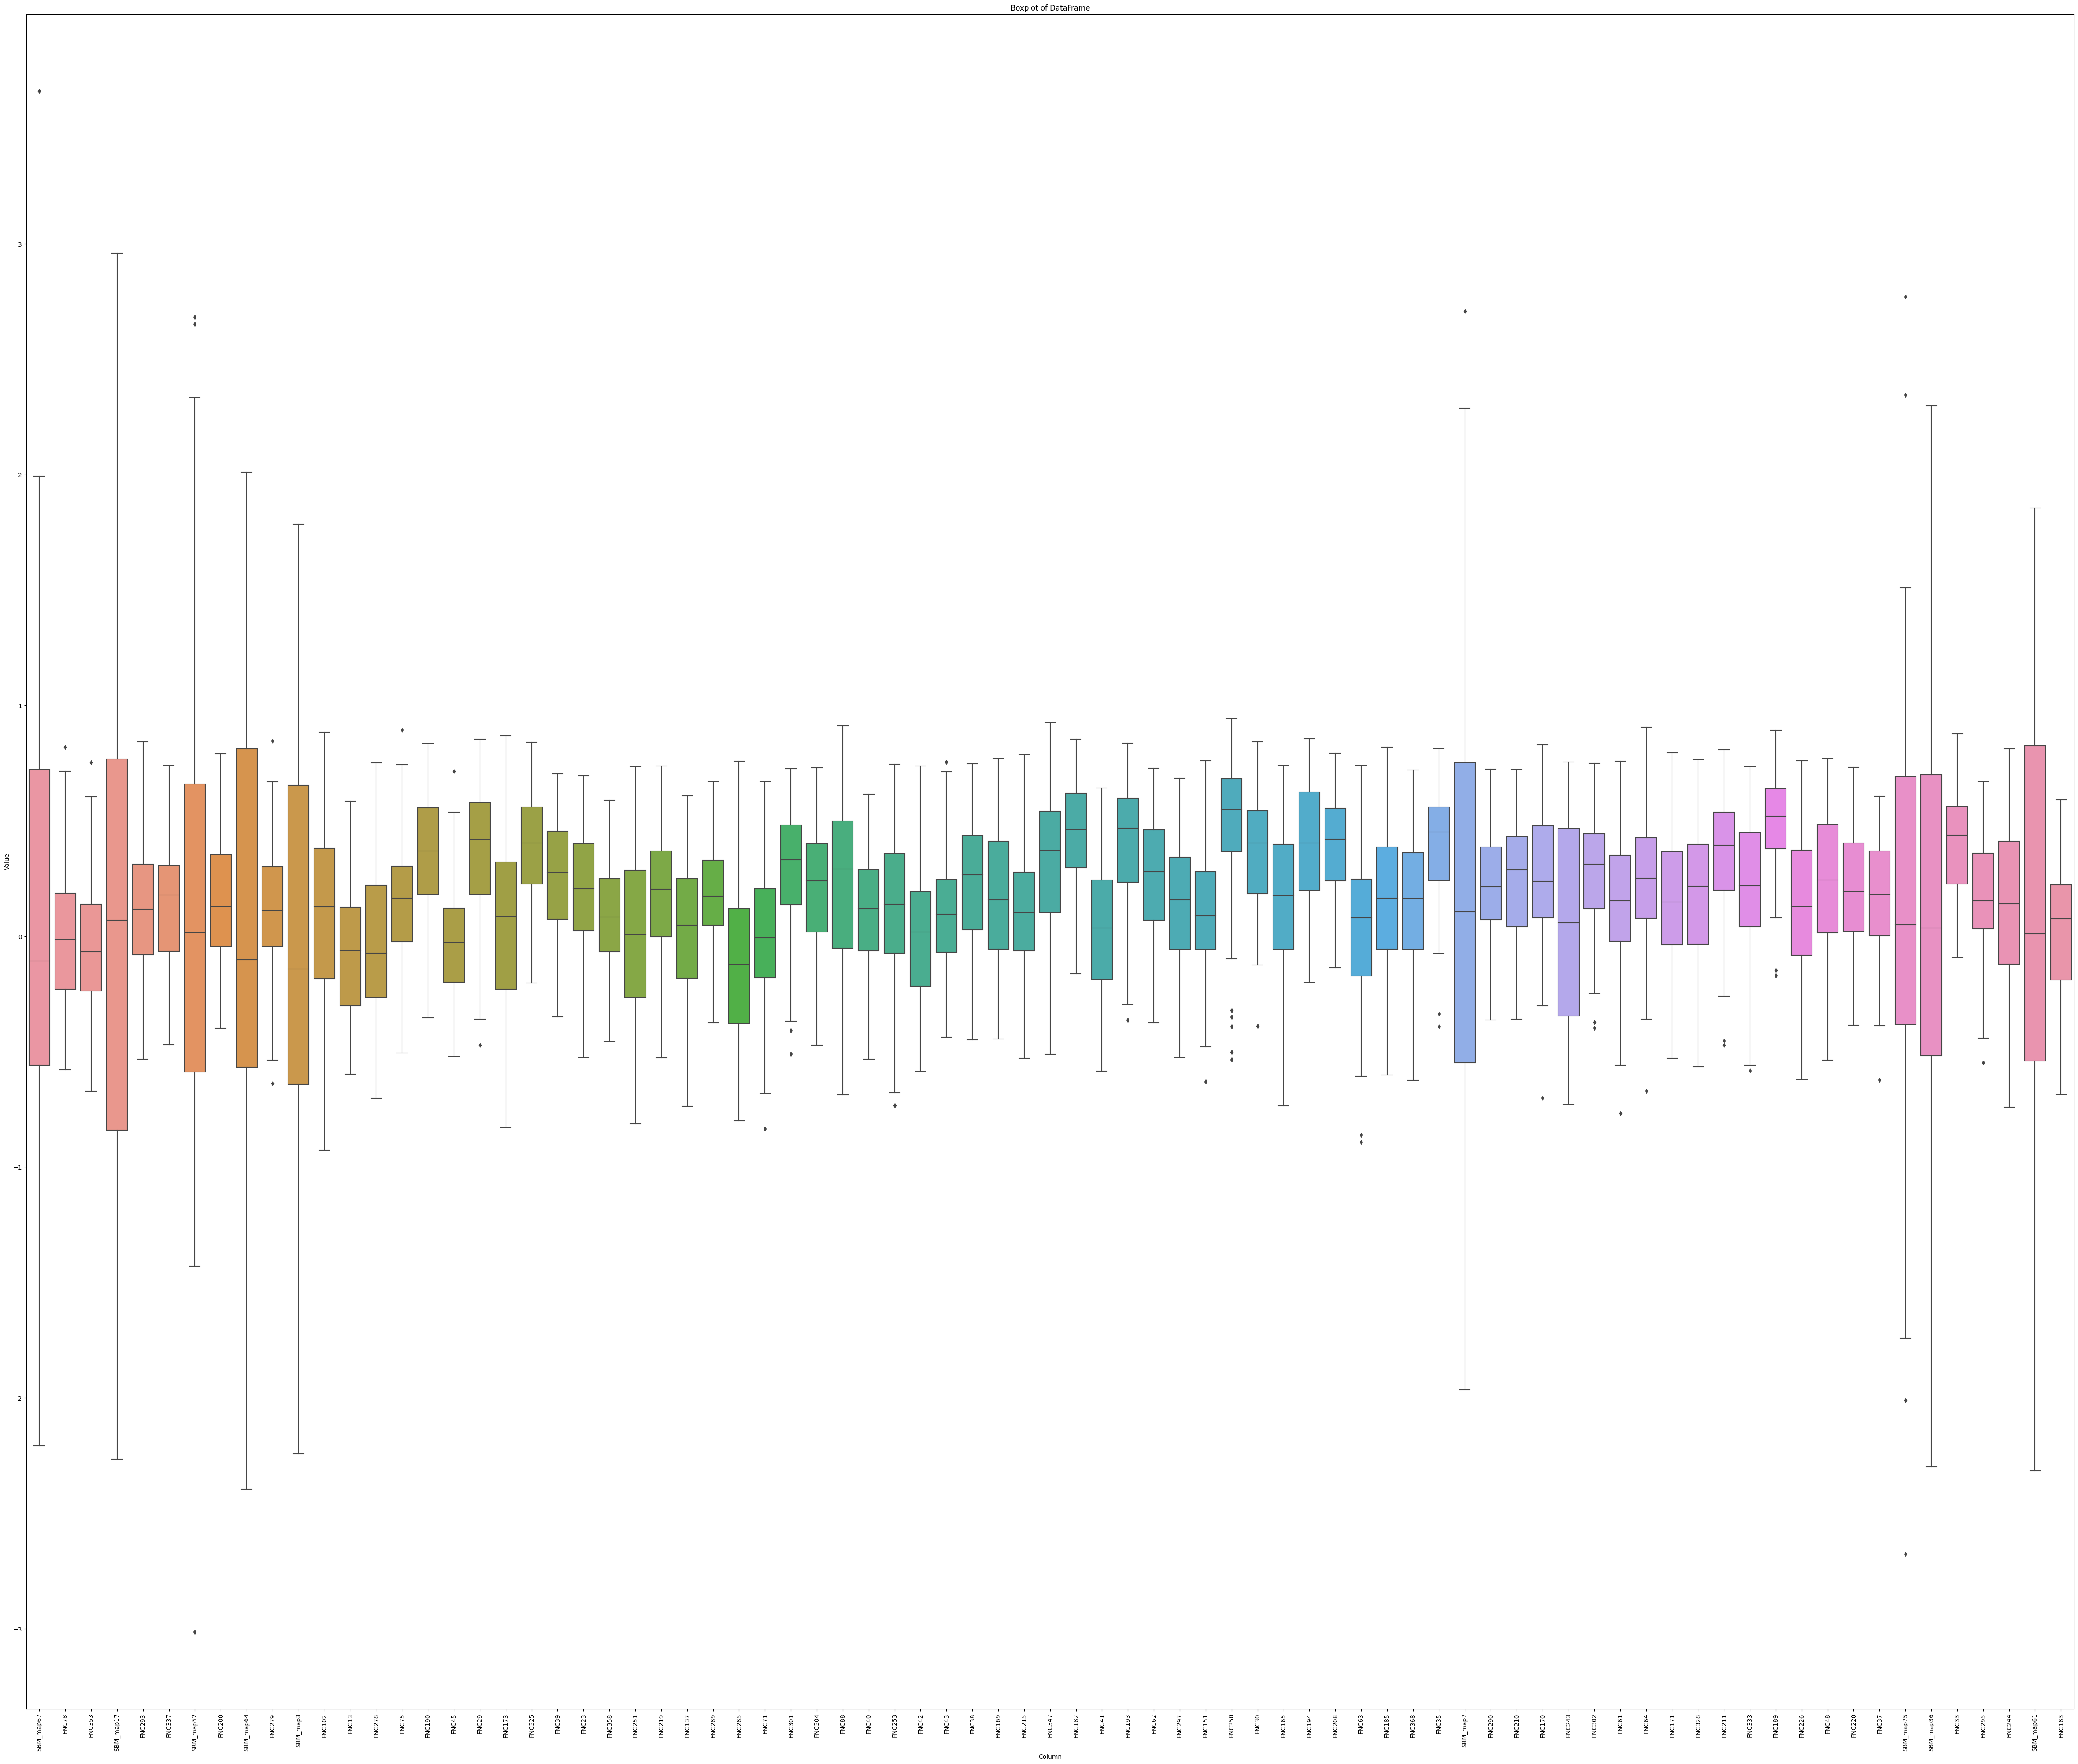

In [20]:
fig, ax = plt.subplots(figsize=(60, 50))
sns.boxplot(data=df_outlier_detection, ax=ax)

ax.set_title('Boxplot of DataFrame')
ax.set_xlabel('Column')
ax.set_ylabel('Value')

plt.xticks(rotation=90)

plt.show()

## I am not able to spot any outlier on the high correlated columns, so i will proceed.

# Data Visualization

In [21]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

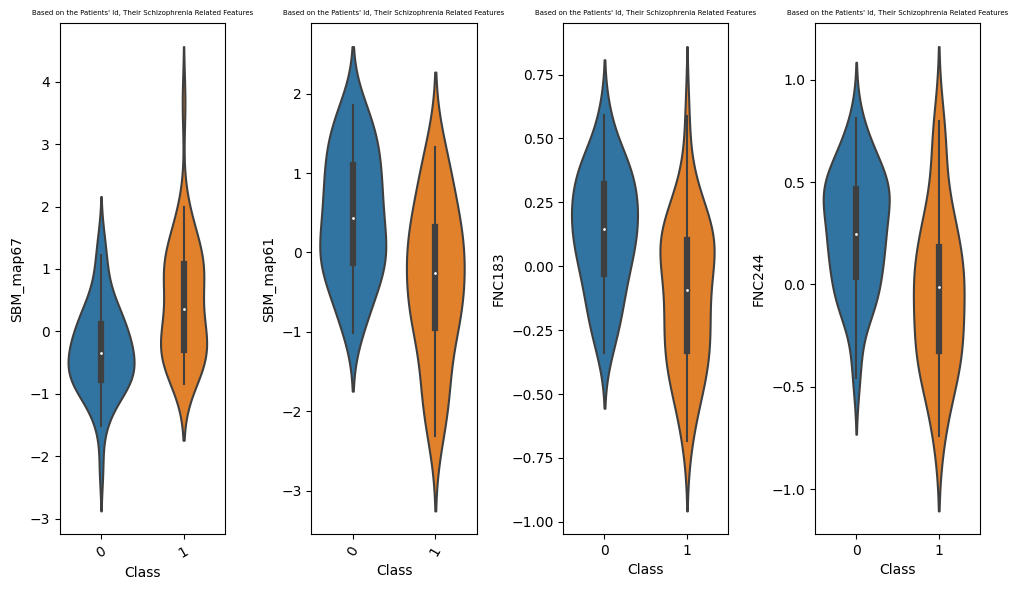

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,6))

sns.violinplot(x="Class", y="SBM_map67", data=df, ax=ax1)
ax1.set_title("Based on the Patients' Id, Their Schizophrenia Related Features", fontsize=5)
ax1.tick_params(axis='x', rotation=30)

sns.violinplot(x="Class", y="SBM_map61", data=df, ax=ax2)
ax2.set_title("Based on the Patients' Id, Their Schizophrenia Related Features", fontsize=5)
ax2.tick_params(axis='x', rotation=60)

sns.violinplot(x="Class", y="FNC183", data=df, ax=ax3)
ax3.set_title("Based on the Patients' Id, Their Schizophrenia Related Features", fontsize=5)

sns.violinplot(x="Class", y="FNC244", data=df, ax=ax4)
ax4.set_title("Based on the Patients' Id, Their Schizophrenia Related Features", fontsize=5)

plt.tight_layout()

# Optionally adjust spacing manually
# plt.subplots_adjust(wspace=0.4)  # Adjust horizontal space between plots

plt.show()

### Why do we flatten in this code below?
    We flatten the axes array because creating a 2x2 subplot results in a 2-dimensional structure. To access each subplot easily in our code, we can convert it into a 1-dimensional array using flattening. This simplifies the indexing process, allowing us to refer to each subplot with a single index (e.g., axs[0], axs[1], etc.) rather than using two indices (e.g., axs[0, 0], axs[0, 1]). This approach makes the code cleaner and more readable.

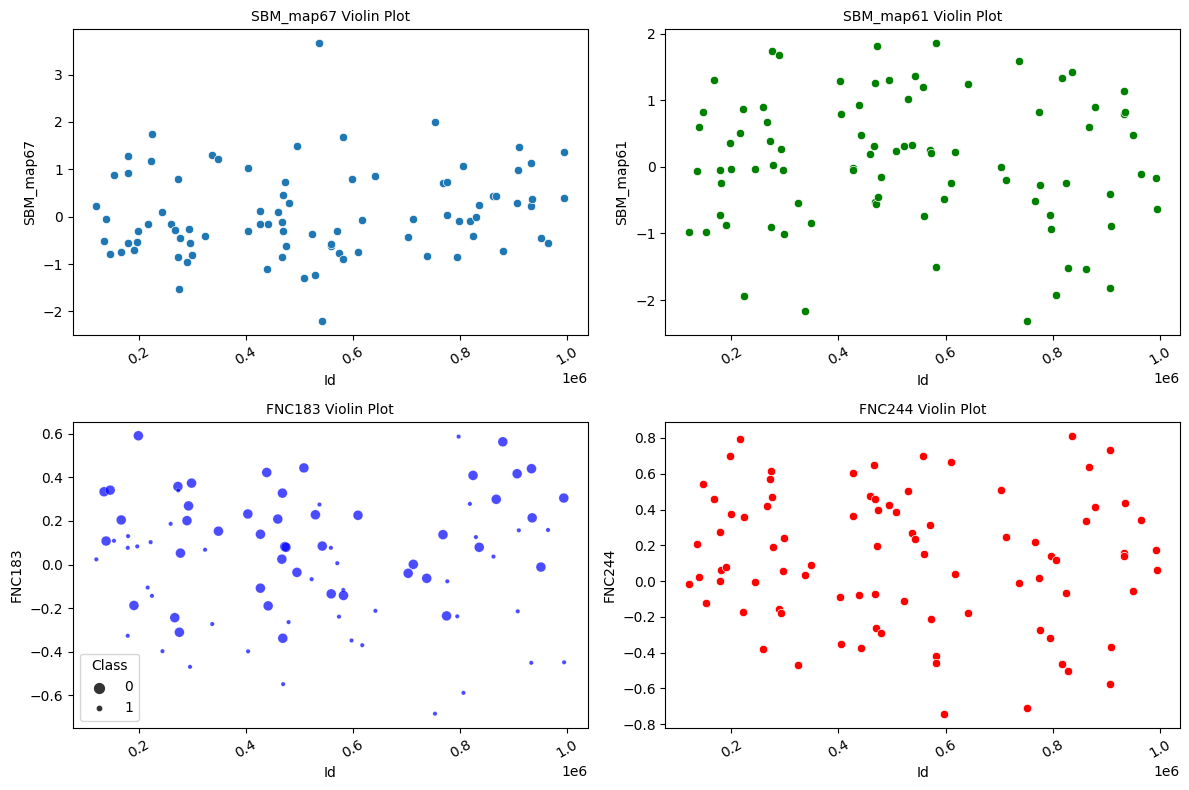

In [23]:
# creating subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) # this creates our template

# flattening the axes array for easier indexing
axs = axs.flatten()

# Plot for SBM_map67
sns.scatterplot(x="Id", y="SBM_map67", data=df, ax=axs[0])
axs[0].set_title("SBM_map67 Violin Plot", fontsize=10)
axs[0].tick_params(axis='x', rotation=30)

# Plot for SBM_map61
sns.scatterplot(x="Id", y="SBM_map61", data=df, ax=axs[1], color='g')
axs[1].set_title("SBM_map61 Violin Plot", fontsize=10)
axs[1].tick_params(axis='x', rotation=30)

# Plot for FNC183
#sns.scatterplot(x="Id", y="FNC183", data=df, ax=axs[2], color='red', s='Class' )
sns.scatterplot(x="Id", y="FNC183", data=df, ax=axs[2], size="Class", 
                sizes=(10, 50),         # Set range for point sizes
                color='blue',           # Set color of the points
                alpha=0.7,              # Set transparency of the points
                edgecolor='w')   
axs[2].set_title("FNC183 Violin Plot", fontsize=10)
axs[2].tick_params(axis='x', rotation=30)

# Plot for FNC244
sns.scatterplot(x="Id", y="FNC244", data=df, ax=axs[3],color='red')
axs[3].set_title("FNC244 Violin Plot", fontsize=10)
axs[3].tick_params(axis='x', rotation=30)

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
df.columns

Index(['Id', 'FNC1', 'FNC2', 'FNC3', 'FNC4', 'FNC5', 'FNC6', 'FNC7', 'FNC8',
       'FNC9',
       ...
       'SBM_map55', 'SBM_map61', 'SBM_map64', 'SBM_map67', 'SBM_map69',
       'SBM_map71', 'SBM_map72', 'SBM_map73', 'SBM_map74', 'SBM_map75'],
      dtype='object', length=412)

In [25]:
df.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,FNC41,FNC42,FNC43,FNC44,FNC45,FNC46,FNC47,FNC48,FNC49,FNC50,FNC51,FNC52,FNC53,FNC54,FNC55,FNC56,FNC57,FNC58,FNC59,FNC60,FNC61,FNC62,FNC63,FNC64,FNC65,FNC66,FNC67,FNC68,FNC69,FNC70,FNC71,FNC72,FNC73,FNC74,FNC75,FNC76,FNC77,FNC78,FNC79,FNC80,FNC81,FNC82,FNC83,FNC84,FNC85,FNC86,FNC87,FNC88,FNC89,FNC90,FNC91,FNC92,FNC93,FNC94,FNC95,FNC96,FNC97,FNC98,FNC99,FNC100,FNC101,FNC102,FNC103,FNC104,FNC105,FNC106,FNC107,FNC108,FNC109,FNC110,FNC111,FNC112,FNC113,FNC114,FNC115,FNC116,FNC117,FNC118,FNC119,FNC120,FNC121,FNC122,FNC123,FNC124,FNC125,FNC126,FNC127,FNC128,FNC129,FNC130,FNC131,FNC132,FNC133,FNC134,FNC135,FNC136,FNC137,FNC138,FNC139,FNC140,FNC141,FNC142,FNC143,FNC144,FNC145,FNC146,FNC147,FNC148,FNC149,FNC150,FNC151,FNC152,FNC153,FNC154,FNC155,FNC156,FNC157,FNC158,FNC159,FNC160,FNC161,FNC162,FNC163,FNC164,FNC165,FNC166,FNC167,FNC168,FNC169,FNC170,FNC171,FNC172,FNC173,FNC174,FNC175,FNC176,FNC177,FNC178,FNC179,FNC180,FNC181,FNC182,FNC183,FNC184,FNC185,FNC186,FNC187,FNC188,FNC189,FNC190,FNC191,FNC192,FNC193,FNC194,FNC195,FNC196,FNC197,FNC198,FNC199,FNC200,FNC201,FNC202,FNC203,FNC204,FNC205,FNC206,FNC207,FNC208,FNC209,FNC210,FNC211,FNC212,FNC213,FNC214,FNC215,FNC216,FNC217,FNC218,FNC219,FNC220,FNC221,FNC222,FNC223,FNC224,FNC225,FNC226,FNC227,FNC228,FNC229,FNC230,FNC231,FNC232,FNC233,FNC234,FNC235,FNC236,FNC237,FNC238,FNC239,FNC240,FNC241,FNC242,FNC243,FNC244,FNC245,FNC246,FNC247,FNC248,FNC249,FNC250,FNC251,FNC252,FNC253,FNC254,FNC255,FNC256,FNC257,FNC258,FNC259,FNC260,FNC261,FNC262,FNC263,FNC264,FNC265,FNC266,FNC267,FNC268,FNC269,FNC270,FNC271,FNC272,FNC273,FNC274,FNC275,FNC276,FNC277,FNC278,FNC279,FNC280,FNC281,FNC282,FNC283,FNC284,FNC285,FNC286,FNC287,FNC288,FNC289,FNC290,FNC291,FNC292,FNC293,FNC294,FNC295,FNC296,FNC297,FNC298,FNC299,FNC300,FNC301,FNC302,FNC303,FNC304,FNC305,FNC306,FNC307,FNC308,FNC309,FNC310,FNC311,FNC312,FNC313,FNC314,FNC315,FNC316,FNC317,FNC318,FNC319,FNC320,FNC321,FNC322,FNC323,FNC324,FNC325,FNC326,FNC327,FNC328,FNC329,FNC330,FNC331,FNC332,FNC333,FNC334,FNC335,FNC336,FNC337,FNC338,FNC339,FNC340,FNC341,FNC342,FNC343,FNC344,FNC345,FNC346,FNC347,FNC348,FNC349,FNC350,FNC351,FNC352,FNC353,FNC354,FNC355,FNC356,FNC357,FNC358,FNC359,FNC360,FNC361,FNC362,FNC363,FNC364,FNC365,FNC366,FNC367,FNC368,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,Class,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,0.165250,0.152740,0.270490,-0.023773,0.057374,-0.13873,0.24606,-0.036653,0.055729,0.195540,0.11568,0.353010,0.33846,0.22753,-0.065594,0.086119,-0.116460,0.41478,-0.35864,0.036615,0.35761,0.57461,0.21516,-0.156410,0.069346,0.39911,-0.086613,0.054857,0.192330,-0.365520,-0.27341,-0.275500,-0.035595,-0.492590,-0.183540,-0.19786,-0.236500,0.22927,0.15965,0.35314,-0.13773,-0.040416,-0.283880,-0.22868,-0.032258,-0.23445,0.42534,0.020722,-0.068762,-0.21617,-0.10530,0.16399,-0.21897,0.076665,-0.40016,-0.309500,-0.198070,-0.379060,-0.440270,-0.383150,-0.509460,-0.40251,0.101500,-0.027104,0.21604,0.13931,-0.118150,-0.43355,0.46781,-0.010129,-0.16441,-0.015152,0.280880,0.187800,-0.24448,0.20537,-0.059828,-0.028747,0.42068,0.08109,0.030801,0.061283,0.322770,0.202950,0.045847,0.48698,-0.19909,0.208740,-0.20510,0.11512,0.26102,0.45505,0.12256,0.24531,0.36257,0.22290,0.12385,-0.029744,0.26057,0.366700,0.19348,0.09547,-0.36363,-0.176480,-0.051969,0.092655,0.23697,0.162980,0.23635,0.38064,0.34044,0.45080,0.29646,0.60907,0.46076,0.064533,0.217620

In [26]:
test_df.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,FNC41,FNC42,FNC43,FNC44,FNC45,FNC46,FNC47,FNC48,FNC49,FNC50,FNC51,FNC52,FNC53,FNC54,FNC55,FNC56,FNC57,FNC58,FNC59,FNC60,FNC61,FNC62,FNC63,FNC64,FNC65,FNC66,FNC67,FNC68,FNC69,FNC70,FNC71,FNC72,FNC73,FNC74,FNC75,FNC76,FNC77,FNC78,FNC79,FNC80,FNC81,FNC82,FNC83,FNC84,FNC85,FNC86,FNC87,FNC88,FNC89,FNC90,FNC91,FNC92,FNC93,FNC94,FNC95,FNC96,FNC97,FNC98,FNC99,FNC100,FNC101,FNC102,FNC103,FNC104,FNC105,FNC106,FNC107,FNC108,FNC109,FNC110,FNC111,FNC112,FNC113,FNC114,FNC115,FNC116,FNC117,FNC118,FNC119,FNC120,FNC121,FNC122,FNC123,FNC124,FNC125,FNC126,FNC127,FNC128,FNC129,FNC130,FNC131,FNC132,FNC133,FNC134,FNC135,FNC136,FNC137,FNC138,FNC139,FNC140,FNC141,FNC142,FNC143,FNC144,FNC145,FNC146,FNC147,FNC148,FNC149,FNC150,FNC151,FNC152,FNC153,FNC154,FNC155,FNC156,FNC157,FNC158,FNC159,FNC160,FNC161,FNC162,FNC163,FNC164,FNC165,FNC166,FNC167,FNC168,FNC169,FNC170,FNC171,FNC172,FNC173,FNC174,FNC175,FNC176,FNC177,FNC178,FNC179,FNC180,FNC181,FNC182,FNC183,FNC184,FNC185,FNC186,FNC187,FNC188,FNC189,FNC190,FNC191,FNC192,FNC193,FNC194,FNC195,FNC196,FNC197,FNC198,FNC199,FNC200,FNC201,FNC202,FNC203,FNC204,FNC205,FNC206,FNC207,FNC208,FNC209,FNC210,FNC211,FNC212,FNC213,FNC214,FNC215,FNC216,FNC217,FNC218,FNC219,FNC220,FNC221,FNC222,FNC223,FNC224,FNC225,FNC226,FNC227,FNC228,FNC229,FNC230,FNC231,FNC232,FNC233,FNC234,FNC235,FNC236,FNC237,FNC238,FNC239,FNC240,FNC241,FNC242,FNC243,FNC244,FNC245,FNC246,FNC247,FNC248,FNC249,FNC250,FNC251,FNC252,FNC253,FNC254,FNC255,FNC256,FNC257,FNC258,FNC259,FNC260,FNC261,FNC262,FNC263,FNC264,FNC265,FNC266,FNC267,FNC268,FNC269,FNC270,FNC271,FNC272,FNC273,FNC274,FNC275,FNC276,FNC277,FNC278,FNC279,FNC280,FNC281,FNC282,FNC283,FNC284,FNC285,FNC286,FNC287,FNC288,FNC289,FNC290,FNC291,FNC292,FNC293,FNC294,FNC295,FNC296,FNC297,FNC298,FNC299,FNC300,FNC301,FNC302,FNC303,FNC304,FNC305,FNC306,FNC307,FNC308,FNC309,FNC310,FNC311,FNC312,FNC313,FNC314,FNC315,FNC316,FNC317,FNC318,FNC319,FNC320,FNC321,FNC322,FNC323,FNC324,FNC325,FNC326,FNC327,FNC328,FNC329,FNC330,FNC331,FNC332,FNC333,FNC334,FNC335,FNC336,FNC337,FNC338,FNC339,FNC340,FNC341,FNC342,FNC343,FNC344,FNC345,FNC346,FNC347,FNC348,FNC349,FNC350,FNC351,FNC352,FNC353,FNC354,FNC355,FNC356,FNC357,FNC358,FNC359,FNC360,FNC361,FNC362,FNC363,FNC364,FNC365,FNC366,FNC367,FNC368,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,100004,0.476127,0.064466,0.053238,-0.608133,0.073988,-0.637038,0.113556,-0.192434,-0.004025,-0.060474,-0.256244,-0.239706,0.113166,-0.136103,-0.322507,0.299439,0.492948,0.233049,-0.312542,0.210541,-0.521582,0.323302,-0.161545,-0.122164,0.369105,0.640831,0.041661,0.196605,0.128142,0.304551,0.352879,0.416197,0.678723,0.277782,0.676364,-0.133499,0.102174,0.022148,0.136891,0.317406,0.464976,0.236121,-0.047108,0.205606,0.089988,-0.147220,0.488782,0.525100,0.618244,0.466729,0.118278,-0.354072,-0.183048,0.329956,0.589278,0.315583,0.295297,-0.600809,0.494652,0.160959,0.255609,-0.193390,-0.083103,0.202220,0.008339,0.381315,-0.366100,-0.039644,-0.486427,-0.006679,-0.495181,0.029642,-0.322448,0.785503,-0.492282,-0.406060,-0.318969,-0.397973,0.974066,0.287127,0.600215,0.774304,0.452479,0.184930,0.539818,0.437920,0.218293,0.308936,0.248976,-0.348114,-0.693480,-0.031707,0.057468,0.627384,-0.404116,0.021114,0.556828,0.499161,-0.618792,0.008733,0.477857,0.308268,0.240793,0.619218,0.698578,-0.027515,0.299079,-0.336364,0.428774,-0.619629,-0.129717,0.417993,-0.261193,0.485990,0.117933,-0.150409,0.139850,0.082803,0.466706,0.586503,0.390515,-0.269

### ..We saved %92 of our data reducing the dimension from 412 to 50.

In [27]:
df = df.drop('Id',axis=1)

In [28]:
x = df.drop('Class',axis=1)
y = df[['Class']]

## Base Model; (since we have so much less data than the test_df we are going to feed all of our data into the model and than make predictions.)
    First i need to decide the best possible algorithm for this dataset.

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
# Define the list of classifiers
classifiers = [
    LogisticRegression(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

# Classifier names
classifier_names = [
    'Logistic Regression',
    'Gradient Boosting Classifier',
    'K-Nearest Neighbors',
    'Gaussian Naive Bayes',
    'Support Vector Classifier (SVM)',
    'Random Forest Classifier',
    'Decision Tree Classifier'
]

In [33]:
# Evaluate each classifier
for i in range(len(classifiers)):
    classifier = classifiers[i]
    name = classifier_names[i]
    
    # Fit the classifier
    classifier.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(x_test)
    
    # Print the classification report and confusion matrix
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()
    print('----------------------------------------------------------')
    print()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.70      0.70      0.70        10

    accuracy                           0.67        18
   macro avg       0.66      0.66      0.66        18
weighted avg       0.67      0.67      0.67        18

Logistic Regression Confusion Matrix:
[[5 3]
 [3 7]]

----------------------------------------------------------

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.40      0.40      0.40        10

    accuracy                           0.33        18
   macro avg       0.33      0.33      0.33        18
weighted avg       0.33      0.33      0.33        18

Gradient Boosting Classifier Confusion Matrix:
[[2 6]
 [6 4]]

----------------------------------------------------------

K-Nearest Neig

## Random forest is the best model! 

### Now lets decide the hyperparamters of random forest;

In [34]:
rf = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='log2',
                            min_samples_leaf=2, min_samples_split = 10, n_estimators=100)

In [35]:
x.shape

(86, 410)

### no train test split, just giving all of the data because we have obivously less data compared to test_df

In [37]:
model = rf.fit(x, y)

In [38]:
test_df.shape

(119748, 411)

In [39]:
test_df.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,FNC41,FNC42,FNC43,FNC44,FNC45,FNC46,FNC47,FNC48,FNC49,FNC50,FNC51,FNC52,FNC53,FNC54,FNC55,FNC56,FNC57,FNC58,FNC59,FNC60,FNC61,FNC62,FNC63,FNC64,FNC65,FNC66,FNC67,FNC68,FNC69,FNC70,FNC71,FNC72,FNC73,FNC74,FNC75,FNC76,FNC77,FNC78,FNC79,FNC80,FNC81,FNC82,FNC83,FNC84,FNC85,FNC86,FNC87,FNC88,FNC89,FNC90,FNC91,FNC92,FNC93,FNC94,FNC95,FNC96,FNC97,FNC98,FNC99,FNC100,FNC101,FNC102,FNC103,FNC104,FNC105,FNC106,FNC107,FNC108,FNC109,FNC110,FNC111,FNC112,FNC113,FNC114,FNC115,FNC116,FNC117,FNC118,FNC119,FNC120,FNC121,FNC122,FNC123,FNC124,FNC125,FNC126,FNC127,FNC128,FNC129,FNC130,FNC131,FNC132,FNC133,FNC134,FNC135,FNC136,FNC137,FNC138,FNC139,FNC140,FNC141,FNC142,FNC143,FNC144,FNC145,FNC146,FNC147,FNC148,FNC149,FNC150,FNC151,FNC152,FNC153,FNC154,FNC155,FNC156,FNC157,FNC158,FNC159,FNC160,FNC161,FNC162,FNC163,FNC164,FNC165,FNC166,FNC167,FNC168,FNC169,FNC170,FNC171,FNC172,FNC173,FNC174,FNC175,FNC176,FNC177,FNC178,FNC179,FNC180,FNC181,FNC182,FNC183,FNC184,FNC185,FNC186,FNC187,FNC188,FNC189,FNC190,FNC191,FNC192,FNC193,FNC194,FNC195,FNC196,FNC197,FNC198,FNC199,FNC200,FNC201,FNC202,FNC203,FNC204,FNC205,FNC206,FNC207,FNC208,FNC209,FNC210,FNC211,FNC212,FNC213,FNC214,FNC215,FNC216,FNC217,FNC218,FNC219,FNC220,FNC221,FNC222,FNC223,FNC224,FNC225,FNC226,FNC227,FNC228,FNC229,FNC230,FNC231,FNC232,FNC233,FNC234,FNC235,FNC236,FNC237,FNC238,FNC239,FNC240,FNC241,FNC242,FNC243,FNC244,FNC245,FNC246,FNC247,FNC248,FNC249,FNC250,FNC251,FNC252,FNC253,FNC254,FNC255,FNC256,FNC257,FNC258,FNC259,FNC260,FNC261,FNC262,FNC263,FNC264,FNC265,FNC266,FNC267,FNC268,FNC269,FNC270,FNC271,FNC272,FNC273,FNC274,FNC275,FNC276,FNC277,FNC278,FNC279,FNC280,FNC281,FNC282,FNC283,FNC284,FNC285,FNC286,FNC287,FNC288,FNC289,FNC290,FNC291,FNC292,FNC293,FNC294,FNC295,FNC296,FNC297,FNC298,FNC299,FNC300,FNC301,FNC302,FNC303,FNC304,FNC305,FNC306,FNC307,FNC308,FNC309,FNC310,FNC311,FNC312,FNC313,FNC314,FNC315,FNC316,FNC317,FNC318,FNC319,FNC320,FNC321,FNC322,FNC323,FNC324,FNC325,FNC326,FNC327,FNC328,FNC329,FNC330,FNC331,FNC332,FNC333,FNC334,FNC335,FNC336,FNC337,FNC338,FNC339,FNC340,FNC341,FNC342,FNC343,FNC344,FNC345,FNC346,FNC347,FNC348,FNC349,FNC350,FNC351,FNC352,FNC353,FNC354,FNC355,FNC356,FNC357,FNC358,FNC359,FNC360,FNC361,FNC362,FNC363,FNC364,FNC365,FNC366,FNC367,FNC368,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,100004,0.476127,0.064466,0.053238,-0.608133,0.073988,-0.637038,0.113556,-0.192434,-0.004025,-0.060474,-0.256244,-0.239706,0.113166,-0.136103,-0.322507,0.299439,0.492948,0.233049,-0.312542,0.210541,-0.521582,0.323302,-0.161545,-0.122164,0.369105,0.640831,0.041661,0.196605,0.128142,0.304551,0.352879,0.416197,0.678723,0.277782,0.676364,-0.133499,0.102174,0.022148,0.136891,0.317406,0.464976,0.236121,-0.047108,0.205606,0.089988,-0.147220,0.488782,0.525100,0.618244,0.466729,0.118278,-0.354072,-0.183048,0.329956,0.589278,0.315583,0.295297,-0.600809,0.494652,0.160959,0.255609,-0.193390,-0.083103,0.202220,0.008339,0.381315,-0.366100,-0.039644,-0.486427,-0.006679,-0.495181,0.029642,-0.322448,0.785503,-0.492282,-0.406060,-0.318969,-0.397973,0.974066,0.287127,0.600215,0.774304,0.452479,0.184930,0.539818,0.437920,0.218293,0.308936,0.248976,-0.348114,-0.693480,-0.031707,0.057468,0.627384,-0.404116,0.021114,0.556828,0.499161,-0.618792,0.008733,0.477857,0.308268,0.240793,0.619218,0.698578,-0.027515,0.299079,-0.336364,0.428774,-0.619629,-0.129717,0.417993,-0.261193,0.485990,0.117933,-0.150409,0.139850,0.082803,0.466706,0.586503,0.390515,-0.269

In [40]:
id = pd.DataFrame()
id = test_df[['Id']]

In [41]:
test_df = test_df.drop('Id',axis=1)

In [42]:
import pickle
with open('rf_best.pkl', 'wb') as f:
    pickle.dump(model , f)

In [43]:
prediction_rf = model.predict_proba(test_df)

In [48]:
prediction_rf.shape #numpy array

(119748, 2)

In [49]:
prediction_rf[:5]

array([[0.5201733 , 0.4798267 ],
       [0.5704174 , 0.4295826 ],
       [0.48426264, 0.51573736],
       [0.54889588, 0.45110412],
       [0.53499206, 0.46500794]])

In [50]:
probabilities = prediction_rf[:, 1]  # for binary classification generally the second index is the probability of occurence (1)

# Create a DataFrame with the probabilities
probabilities_df = pd.DataFrame(probabilities, columns=['Probability'])

In [51]:
probabilities_df.head()

,Probability
0,0.479827
1,0.429583
2,0.515737
3,0.451104
4,0.465008


In [52]:
submission_df = pd.DataFrame({
    'Id': id['Id'],
    'Probability': probabilities_df['Probability']
})

In [53]:
submission_df.isna().sum()

Id             0
Probability    0
dtype: int64

In [54]:
submission_df.to_csv('submission.csv', index=False)

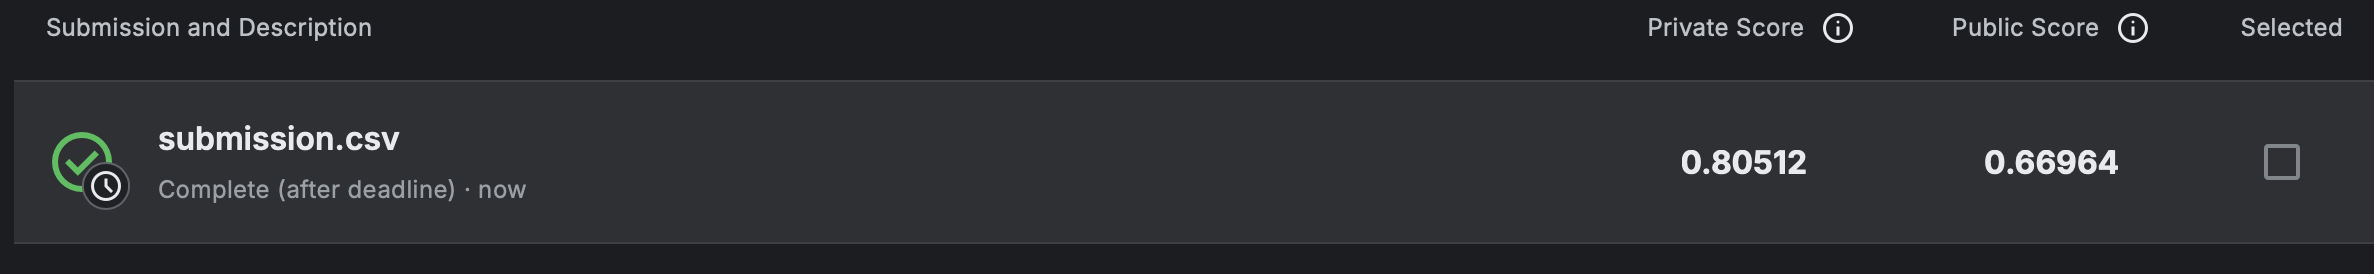

In [56]:
from PIL import Image
Image.open('/Users/yavuzalpdemirci/Desktop/screenshots/Screenshot 2024-09-21 at 11.58.40.png')